In [ ]:
# 출처 : 유튜브 오늘코드 박조은 강사님 강의

In [ ]:
# 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [23]:
# pandas, numpy 라이브러리 로드하기
import pandas as pd
import numpy as np

In [3]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
# f는 포맷을 의미 (포맷팅)
file_name = f"seoul-covid19-11_28_.csv"
file_name

'seoul-covid19-11_28_.csv'

In [4]:
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv(file_name)
df.shape

(8652, 7)

In [5]:
# "연번"을 기준으로 역순으로 정렬합니다.
df = df.sort_values("연번", ascending = False)

In [6]:
# head 로 미리보기를 합니다.
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN


In [7]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
8651,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


## 시각화 도구 불러오기

<AxesSubplot:title={'center':'한글'}>

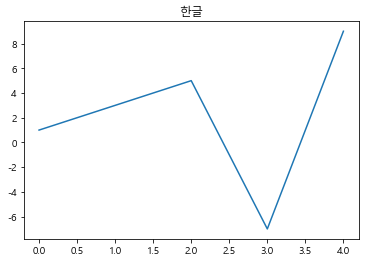

In [8]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다. (판다스를 위한 시각화 도구)
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.
# 참고 : matplotlib을 사용하기 편리하게 해놓은 seaborn
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic") #맥은 AppleGothic
plt.rc("axes", unicode_minus = False)

# Series 형태로 바꾸어주지 않은 리스트에는 판다스 기능 적용불가
pd.Series([1,3,5,-7,9]).plot(title = "한글")

# subplot 하나를 axes로 부름

### 시각화 선명하게 설정하기

In [9]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일

In [10]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
df["확진일"].value_counts().head()

11.25.    212
11.26.    204
11.27.    178
8.29.     167
8.27.     160
Name: 확진일, dtype: int64

In [11]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head()

0    11.28.
1    11.28.
2    11.28.
3    11.28.
4    11.28.
Name: 확진일, dtype: object

In [12]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020." + df["확진일"])
df[["확진일", "확진일자"]].describe()
# freq : top이 몇 번 등장하는지
# unique값이 다른 것은 텍스트가 datetime으로 바꿔지지 않는 형태로 들어가 있어서일 가능성..

<ipython-input-12-46bb883ec141>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[["확진일", "확진일자"]].describe()


,확진일,확진일자
count,8652,8652
unique,283,281
top,11.25.,2020-11-25 00:00:00
freq,212,212
first,NaN,2020-01-24 00:00:00
last,NaN,2020-11-28 00:00:00


In [13]:
# 월만 추출합니다. 판다스의 dt함수 사용

df["월"] = df["확진일자"].dt.month

In [14]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.isocalendar().week
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,8652,33532,11.28.,서대문구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
1,8651,33756,11.28.,타시도,-,감염경로 조사중,NaN,2020-11-28,11,48
2,8650,33772,11.28.,동작구,-,동작구 임용단기학원 관련,NaN,2020-11-28,11,48
3,8649,33776,11.28.,은평구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
4,8648,33768,11.28.,서초구,-,기타 확진자 접촉,NaN,2020-11-28,11,48
...,...,...,...,...,...,...,...,...,...,...
8647,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5
8648,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5
8649,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5
8650,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

<AxesSubplot:title={'center':'확진일자별 확진자 수'}>

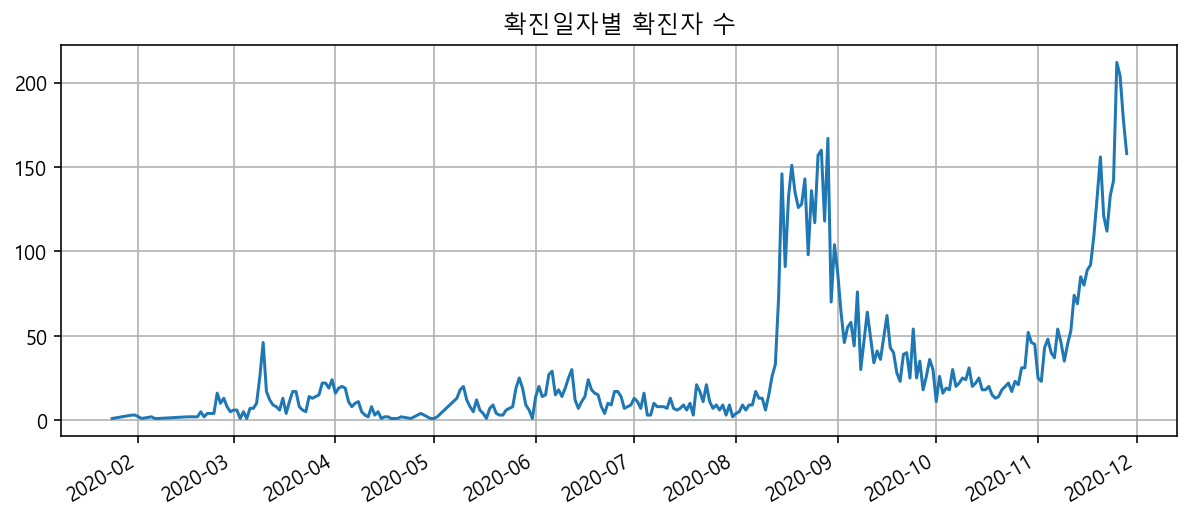

In [15]:
# 확진일자로 선그래프를 그립니다.
df["확진일자"].value_counts().plot(title = "확진일자별 확진자 수",
                               figsize = (10, 4), grid = True)

In [16]:
# 참고 : %timeit 코드 : 실행시간 알려줌

### 확진자가 가장 많이 나온 날

In [17]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
df["확진일자"].describe()

<ipython-input-17-e5fd44a8918a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["확진일자"].describe()


count                    8652
unique                    281
top       2020-11-25 00:00:00
freq                      212
first     2020-01-24 00:00:00
last      2020-11-28 00:00:00
Name: 확진일자, dtype: object

In [18]:
# 확진자가 가장 많았던 날을 찾습니다.
df[df["확진일자"] == "2020-11-25"]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
540,8112,31995,11.25.,타시도,-,기타 확진자 접촉,NaN,2020-11-25,11,48
541,8111,31997,11.25.,타시도,-,중구 소재 보람상조회사 관련,NaN,2020-11-25,11,48
542,8110,32080,11.25.,동작구,-,감염경로 조사중,NaN,2020-11-25,11,48
543,8109,32187,11.25.,중랑구,-,감염경로 조사중,NaN,2020-11-25,11,48
544,8108,32015,11.25.,타시도,-,감염경로 조사중,NaN,2020-11-25,11,48
...,...,...,...,...,...,...,...,...,...,...
747,7905,31868,11.25.,동작구,-,동작구 임용단기고시 관련,NaN,2020-11-25,11,48
748,7904,31823,11.25.,동작구,-,기타 확진자 접촉,NaN,2020-11-25,11,48
749,7903,31882,11.25.,용산구,-,감염경로 조사중,NaN,2020-11-25,11,48
750,7902,31878,11.25.,용산구,-,기타 확진자 접촉,NaN,2020-11-25,11,48


In [19]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.
df["접촉력"].unique()

array(['기타 확진자 접촉', '감염경로 조사중', '동작구 임용단기학원 관련', '동대문구 체육시설 관련',
       '강서구 댄스교습관련 시설', '타시도 확진자 접촉', '해외 유입', '서초구 건설회사 관련', '소규모 지인모임',
       '서초구 사우나Ⅱ 관련', '강서구 댄스교습관련 시설 ', '동작구 임용단기고시 관련', '어플소모임 관련',
       '마포구 홍대새교회 관련', '강서구 댄스교습관련 시설(서울대효병원)', '강서구 가족 관련',
       '동창 운동 모임 관련', '노원구 가족관련', '강남구 연기학원 관련', '중랑구 실내 체육시설 Ⅱ 관련',
       '노원구청 관련', '수도권산악회(11월) 관련 ', '중구 제조업공장 관련', '연세대 학생 관련',
       '서대문구 요양시설 관련', '송파구 사우나 관련', '마포구 소재 노인복지시설 관련', '강남구 음식점Ⅱ 관련',
       '삼성서울병원 관련', '강서구 경로당 관련', '서초구 사우나 관련', '강서구 소재 병원관련(11월)',
       '지인-가족전파', '중구 소재 보람상조회사 관련', '어름 소모임 관련', '어플 소모임 관련',
       '중랑구 체육시설 Ⅱ 관련', '용산구 국군복지단 관련', '중구 소재 상조회사 관련', '성동구 소재 PC방 관련',
       '동작구 모조카페 관련', '마포구 홍대세교회관련', '수도권 지인모임(11월) 관련', '중구 교회 관련',
       '중랑구 실내체육시설 관련', '마포구 홍대세교회 관련', '동대문구 고등학교(마포구 홍대 새교회관련)',
       '감염경로 조사 중', '노원구 의료기관 관련', '강남구 헬스장 관련', '성북구 가족 관련',
       '송파구 잠언의료기(강남구CJ텔레닉스)', '수도권산악회(11월) 관련', '동작구 교회 기도처 관련',
       '동작구 모조카페', '성동구 금호노인요양원 관련', '동대문구 에이스희망케어센터 관련'

### 막대그래프 그리기

<AxesSubplot:>

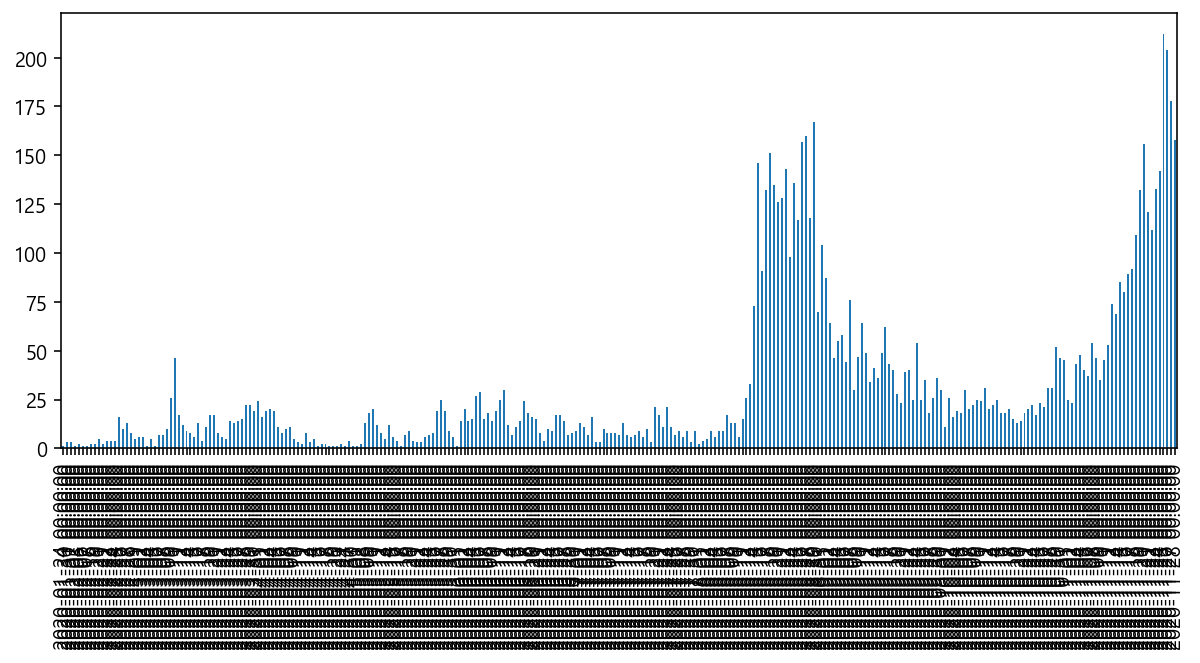

In [22]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
# 빈도수 높은 순으로, 모든 날짜 표시해줌
# 막대그래프는 데이터를 범주형이라고 인식함, 빈도수로 자동 정렬
# 연속된 수치 데이터는 선그래프로 그리는게 좋을수 있음

day_count = df["확진일자"].value_counts().sort_index()
day_count.plot.bar(figsize = (10,4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

<AxesSubplot:>

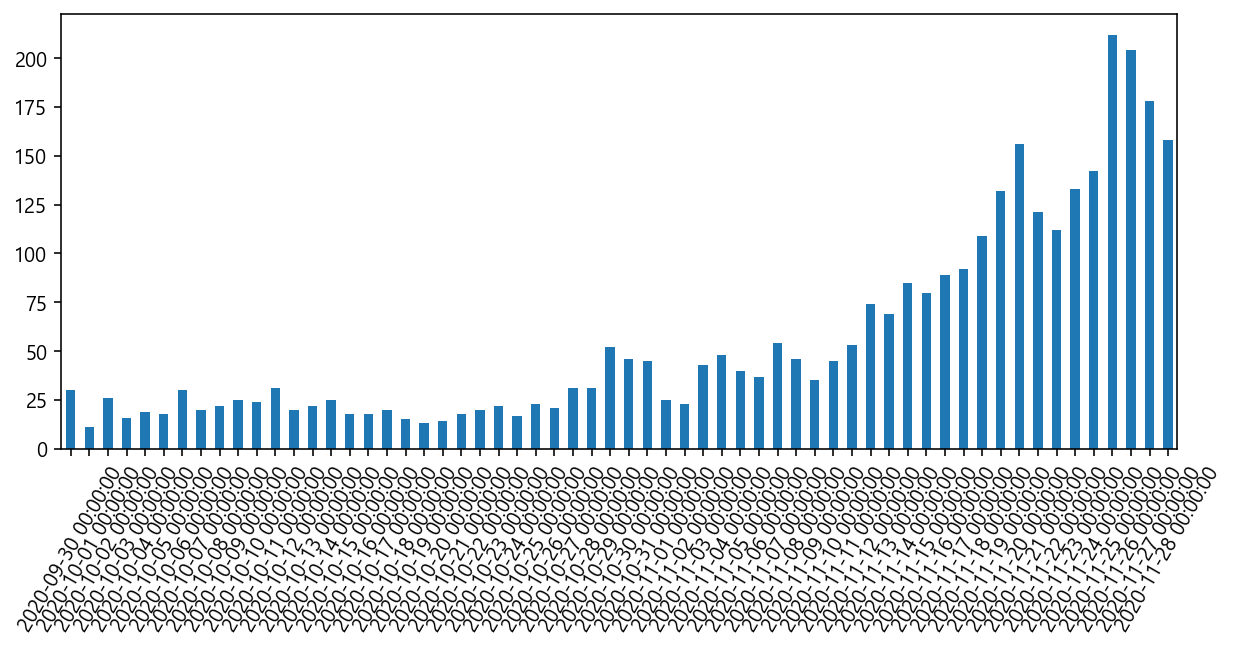

In [24]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
# rot로 라벨 텍스트 기울기 설정해줄 수 있음
# 라벨값 조정하려면 matplotlib에서 설정을 일일이 조정해줘야 함
# plotly로 비교적 손쉽게 인터랙티브 시각화도 가능

day_count[-60:].plot.bar(figsize = (10,4), rot = 60)

### 월별 확진자 수 그리기

<AxesSubplot:title={'center':'월별 확진자 수'}>

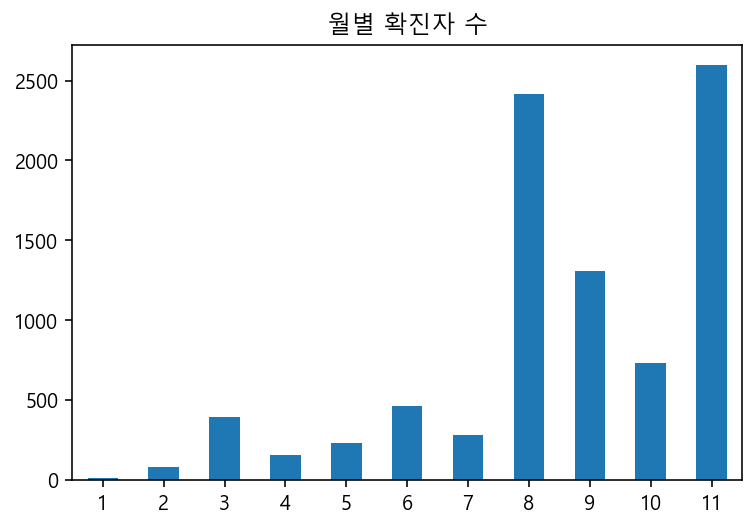

In [25]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
df["월"].value_counts().sort_index().plot.bar(rot = 0, title = "월별 확진자 수")

### 주단위 확진자수 그리기

In [26]:
# 주별로 빈도수를 구합니다.
# value_counts()는 값이 큰 순서대로 자동으로 정렬. sort_index() 해줘야 시간순 정렬
week_count = df["주"].value_counts().sort_index()

<AxesSubplot:title={'center':'주별 확진자 수'}>

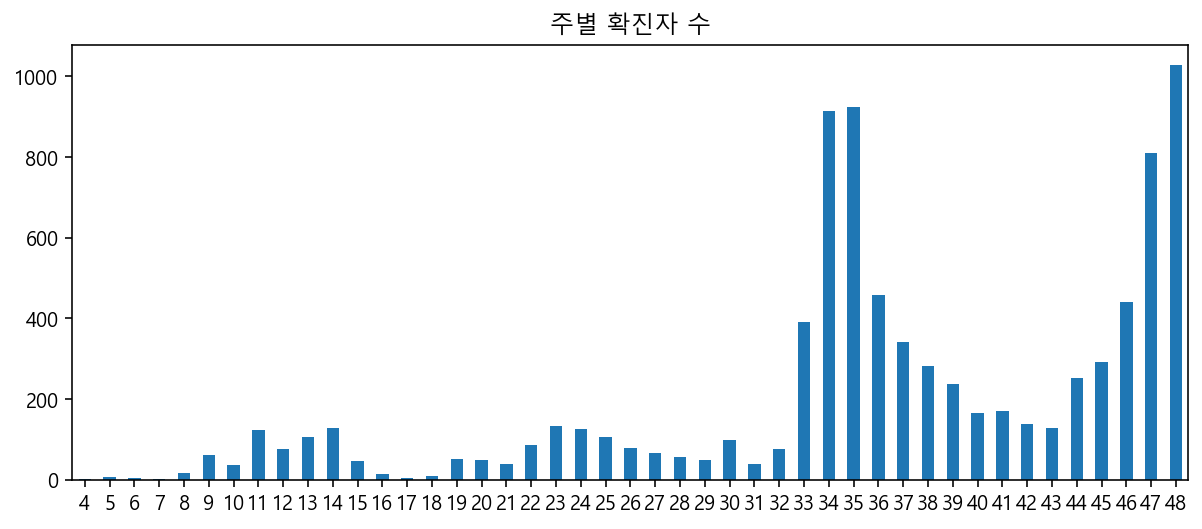

In [27]:
# 주단위 빈도수 막대그래프로 그리기
week_count.plot.bar(figsize = (10,4), rot = 0, title = "주별 확진자 수")

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [28]:
df["확진일자"].value_counts().sort_index()
# 초반에 빠진날이 있어서 모든 날짜에 대한 시각화가 안됨

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2020-11-24    142
2020-11-25    212
2020-11-26    204
2020-11-27    178
2020-11-28    158
Name: 확진일자, Length: 281, dtype: int64

In [29]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.
# iloc는 인덱스 순서로 데이터 가져올 수 있음
first_day = df.iloc[-1]["확진일자"]
first_day

Timestamp('2020-01-24 00:00:00')

In [30]:
last_day = df.iloc[0]["확진일자"]
last_day

Timestamp('2020-11-28 00:00:00')

In [31]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)

In [32]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days = days.to_frame()

In [33]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts().sort_index()

In [34]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
df_daily_case = daily_case.reset_index()
df_daily_case

,index,확진일자
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
276,2020-11-24,142
277,2020-11-25,212
278,2020-11-26,204
279,2020-11-27,178


In [35]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기
df_daily_case.columns = ["확진일자", "확진수"]
df_daily_case

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
276,2020-11-24,142
277,2020-11-25,212
278,2020-11-26,204
279,2020-11-27,178


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [36]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, left_on = df_days.index, right_on = "확진일자", how = "left")
all_day = all_day.drop(0, axis = 1)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
305,2020-11-24,142.0
306,2020-11-25,212.0
307,2020-11-26,204.0
308,2020-11-27,178.0


## 누적 확진자 수 구하기

In [37]:
type(np.nan)

float

In [38]:
# 확진수를 fillna를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.
# 확진수 컬럼은 nan값 때문에 float 타입으로 되어있음
all_day = all_day.fillna(0)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,0.0
2,2020-01-26,0.0
3,2020-01-27,0.0
4,2020-01-28,0.0
...,...,...
305,2020-11-24,142.0
306,2020-11-25,212.0
307,2020-11-26,204.0
308,2020-11-27,178.0


In [39]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기
# string type으로 바꾸고 인덱싱
all_day["일자"] = all_day["확진일자"].astype(str).str[-5:]
all_day

,확진일자,확진수,일자
0,2020-01-24,1.0,01-24
1,2020-01-25,0.0,01-25
2,2020-01-26,0.0,01-26
3,2020-01-27,0.0,01-27
4,2020-01-28,0.0,01-28
...,...,...,...
305,2020-11-24,142.0,11-24
306,2020-11-25,212.0,11-25
307,2020-11-26,204.0,11-26
308,2020-11-27,178.0,11-27


In [40]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
# cum_day
all_day["누적확진"] = all_day["확진수"].cumsum()
all_day.head(20)

,확진일자,확진수,일자,누적확진
0,2020-01-24,1.0,01-24,1.0
1,2020-01-25,0.0,01-25,1.0
2,2020-01-26,0.0,01-26,1.0
3,2020-01-27,0.0,01-27,1.0
4,2020-01-28,0.0,01-28,1.0
5,2020-01-29,0.0,01-29,1.0
6,2020-01-30,3.0,01-30,4.0
7,2020-01-31,3.0,01-31,7.0
8,2020-02-01,0.0,02-01,7.0
9,2020-02-02,1.0,02-02,8.0


### 데이터프레임으로 그리기

<AxesSubplot:title={'center':'확진수와 누적확진수'}, xlabel='확진일자'>

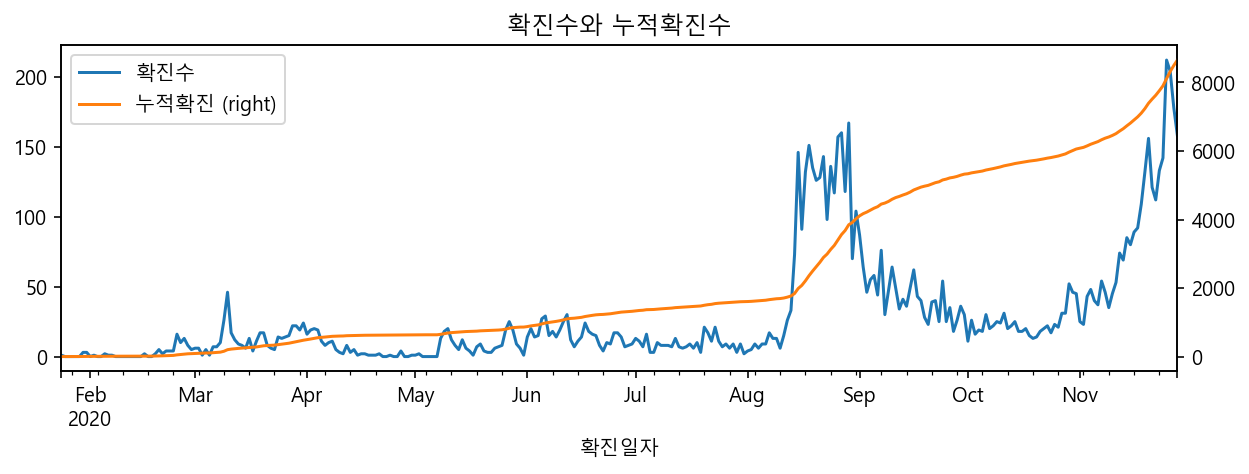

In [41]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
# x축에 들어갈 값을 인덱스로 만들어주면 됨 (여기서 확진일자)
# 권장하는 방법은 아님 (확진수, 누적확진수 스케일이 달라서 확진수의 변화가 잘 안보임)
# 스케일 다를때 1) 그래프 그릴 때 스케일이 다른 경우 로그변환 해서 그리기도 함
# 스케일 다를때 2) secondary_y : 스케일을 y축에 추가해줌

all_day.set_index("확진일자")[["확진수", "누적확진"]].plot(figsize=(10,3), title = "확진수와 누적확진수",
                                                secondary_y = "누적확진")

### 시리즈로 그리기

<AxesSubplot:xlabel='확진일자'>

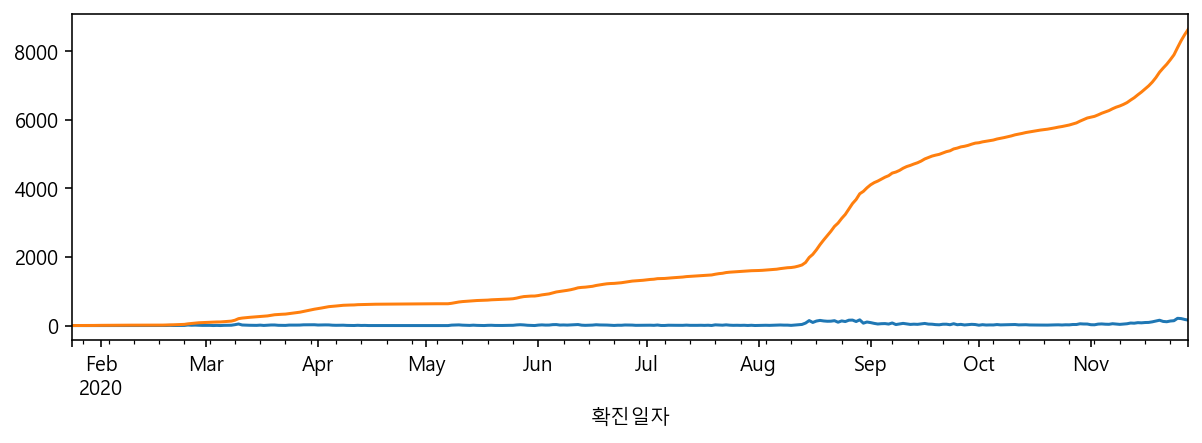

In [42]:
# 시리즈로 2개의 그래프 그리기
# 연속으로 코드 쓰면 겹쳐서 그려줌
# 범례값을 따로 설정해줘야 하므로 위 방법이 편리함
all_day.set_index("확진일자")["확진수"].plot(figsize = (10,3))
all_day.set_index("확진일자")["누적확진"].plot()

### 확진수만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

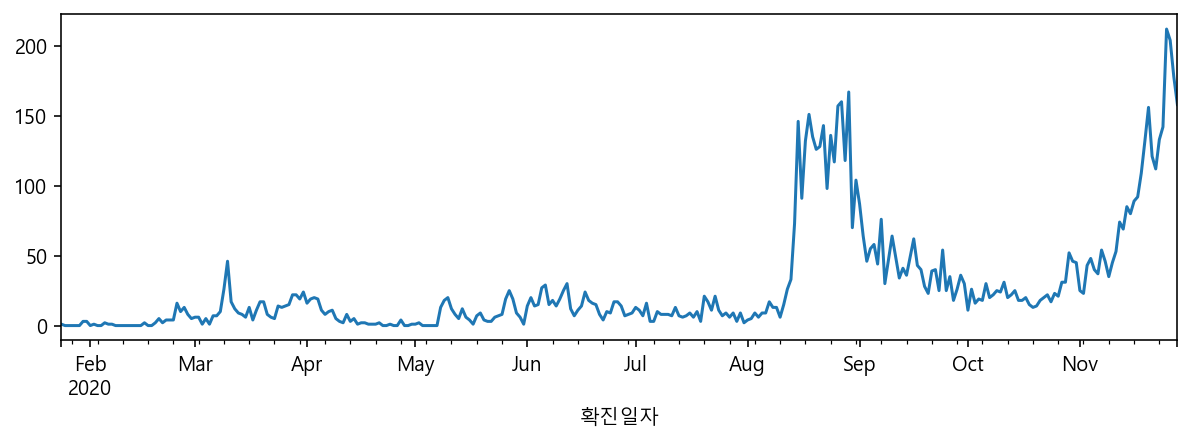

In [43]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
# pandas로 그래프 그릴때는 중심축을 set_index 해주는게 중요 (cf. seaborn)
# seaborn으로 시각화 하는 것은 조금 차이가 있음. pandas, seaborn이 각각 강점있는 분야가 있음.
all_day.set_index("확진일자")["확진수"].plot(figsize = (10, 3))

### 누적확진만 따로 그리기

<AxesSubplot:xlabel='확진일자'>

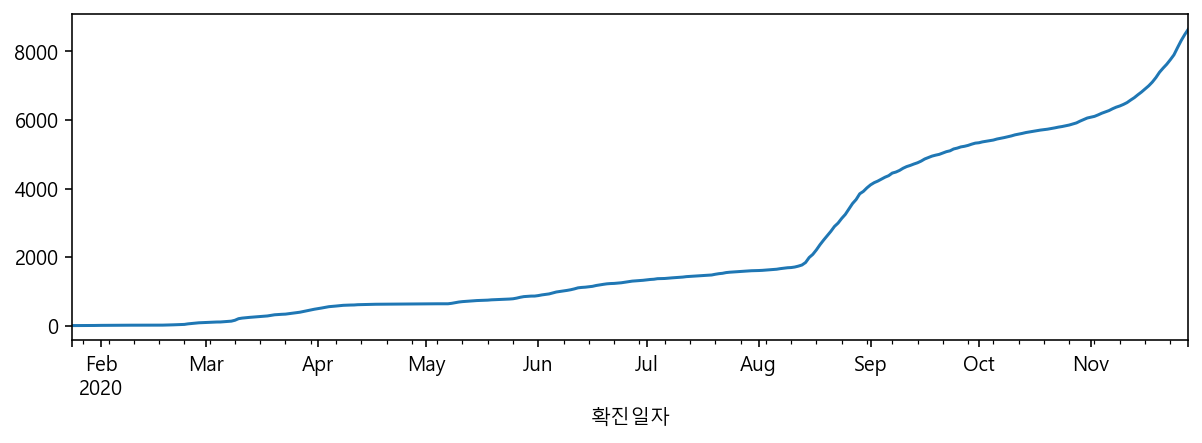

In [44]:
# 누적확진만 따로 그립니다.
all_day.set_index("확진일자")["누적확진"].plot(figsize = (10, 3))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

In [45]:
all_day = all_day.set_index("확진일자")

<AxesSubplot:>

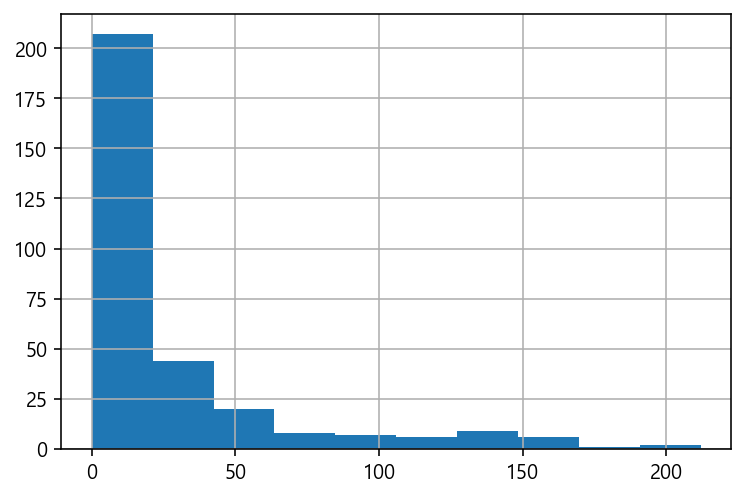

In [46]:
all_day["확진수"].hist()

<AxesSubplot:>

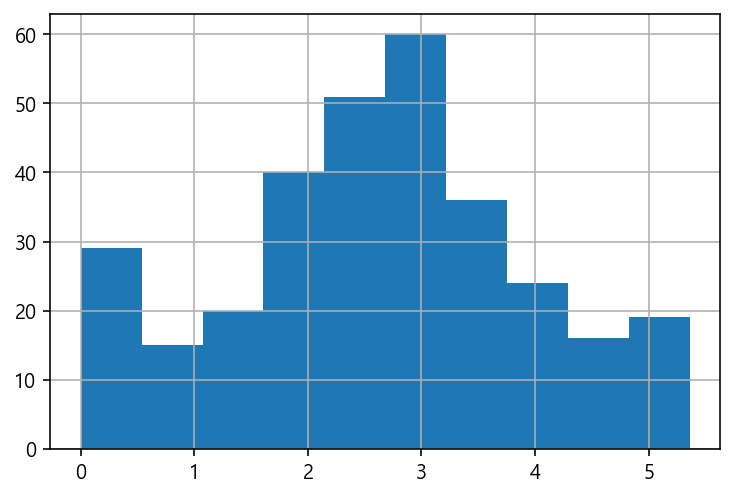

In [47]:
# 로그값으로 정규화
np.log1p(all_day["확진수"]).hist()

<AxesSubplot:xlabel='확진일자'>

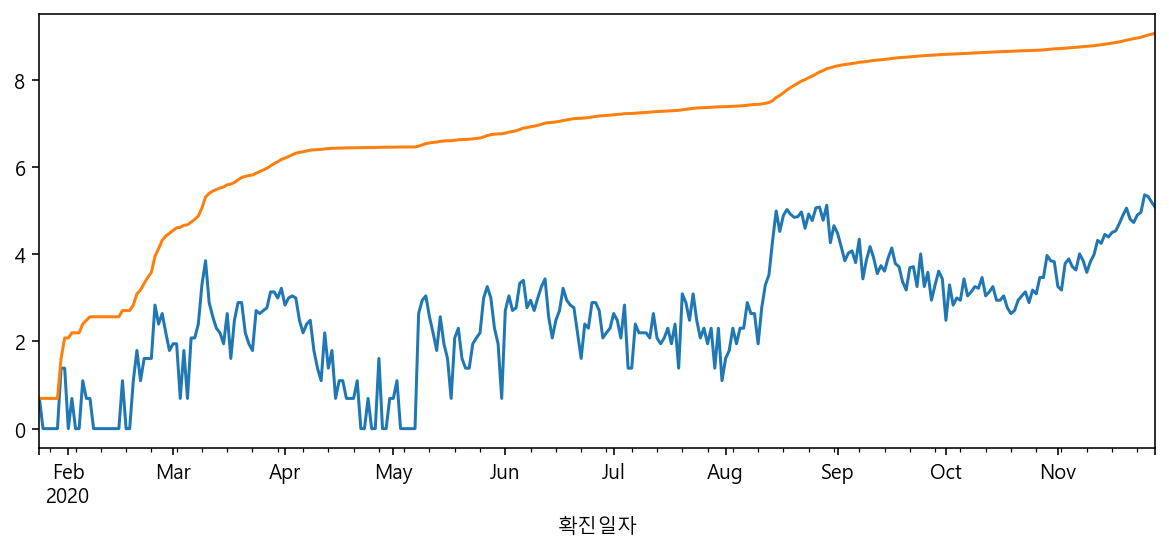

In [48]:
# 0값에 로그 취하면 -inf 나와서 오류남
# 아래 2개 방법중 하나로 (1을 더해주거나 log1p 함수 쓰거나)
# np.log(all_day["확진수"] + 1)
# seaborn에는 로그 취하는것이 옵션으로 들어있음

np.log1p(all_day["확진수"]).plot(figsize = (10,4))
np.log1p(all_day["누적확진"]).plot()

## 확진월과 요일 구하기

In [49]:
# cum_day
# all_day
df_all_day = all_day.reset_index()
df_all_day["월"] = df_all_day["확진일자"].dt.month
df_all_day["요일"] = df_all_day["확진일자"].dt.dayofweek
df_all_day

,확진일자,확진수,일자,누적확진,월,요일
0,2020-01-24,1.0,01-24,1.0,1,4
1,2020-01-25,0.0,01-25,1.0,1,5
2,2020-01-26,0.0,01-26,1.0,1,6
3,2020-01-27,0.0,01-27,1.0,1,0
4,2020-01-28,0.0,01-28,1.0,1,1
...,...,...,...,...,...,...
305,2020-11-24,142.0,11-24,7900.0,11,1
306,2020-11-25,212.0,11-25,8112.0,11,2
307,2020-11-26,204.0,11-26,8316.0,11,3
308,2020-11-27,178.0,11-27,8494.0,11,4


In [50]:
df_all_day.groupby(["월", "요일"])["확진수"].sum()

월   요일
1   0       0.0
    1       0.0
    2       0.0
    3       3.0
    4       4.0
          ...  
11  2     422.0
    3     450.0
    4     440.0
    5     418.0
    6     263.0
Name: 확진수, Length: 77, dtype: float64

### 요일별 확진 수 

In [51]:
# 월별, 요일별 확진수를 groupby로 구하기
# 0은 월요일, 6은 일요일
# 피벗테이블로 할수 있는건 groupby로도 다 할 수 있고, 연산은 groupby로 더 다양하게 할 수 있다.
all_day_week = df_all_day.groupby(["월", "요일"])["확진수"].sum().unstack()
all_day_week

요일,0,1,2,3,4,5,6
월,,,,,,,
1,0.0,0.0,0.0,3.0,4.0,0.0,0.0
2,4.0,16.0,14.0,19.0,11.0,9.0,7.0
3,69.0,89.0,46.0,44.0,48.0,45.0,50.0
4,16.0,17.0,28.0,27.0,26.0,22.0,20.0
5,27.0,36.0,34.0,34.0,32.0,36.0,29.0
6,55.0,67.0,66.0,75.0,90.0,70.0,37.0
7,37.0,42.0,42.0,58.0,34.0,40.0,28.0
8,387.0,289.0,327.0,328.0,336.0,473.0,277.0
9,177.0,242.0,228.0,207.0,169.0,155.0,126.0


In [52]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [53]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.
all_day_week.columns = dayofweek

In [54]:
# style.background_gradient 로 색상을 표현합니다.
# background_gradient(시리즈별로 높은 숫자 색으로 표시)보다 heatmap(전체 데이터에 대해서) 사용을 권장
# matplotlib cmap으로 검색하면 sequential, diverging, cyclic... 등 컬러맵 옵션 볼 수 있음
all_day_week.astype(int).T.style.background_gradient(cmap = "Purples")

월,1,2,3,4,5,6,7,8,9,10,11
월,0,4,69,16,27,55,37,387,177,72,280
화,0,16,89,17,36,67,42,289,242,97,322
수,0,14,46,28,34,66,42,327,228,94,422
목,3,19,44,27,34,75,58,328,207,123,450
금,4,11,48,26,32,90,34,336,169,137,440
토,0,9,45,22,36,70,40,473,155,122,418
일,0,7,50,20,29,37,28,277,126,88,263


## 거주지별 확진자

In [55]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
gu_count = df["거주지"].value_counts()

<AxesSubplot:title={'center':'구별 확진자 수'}>

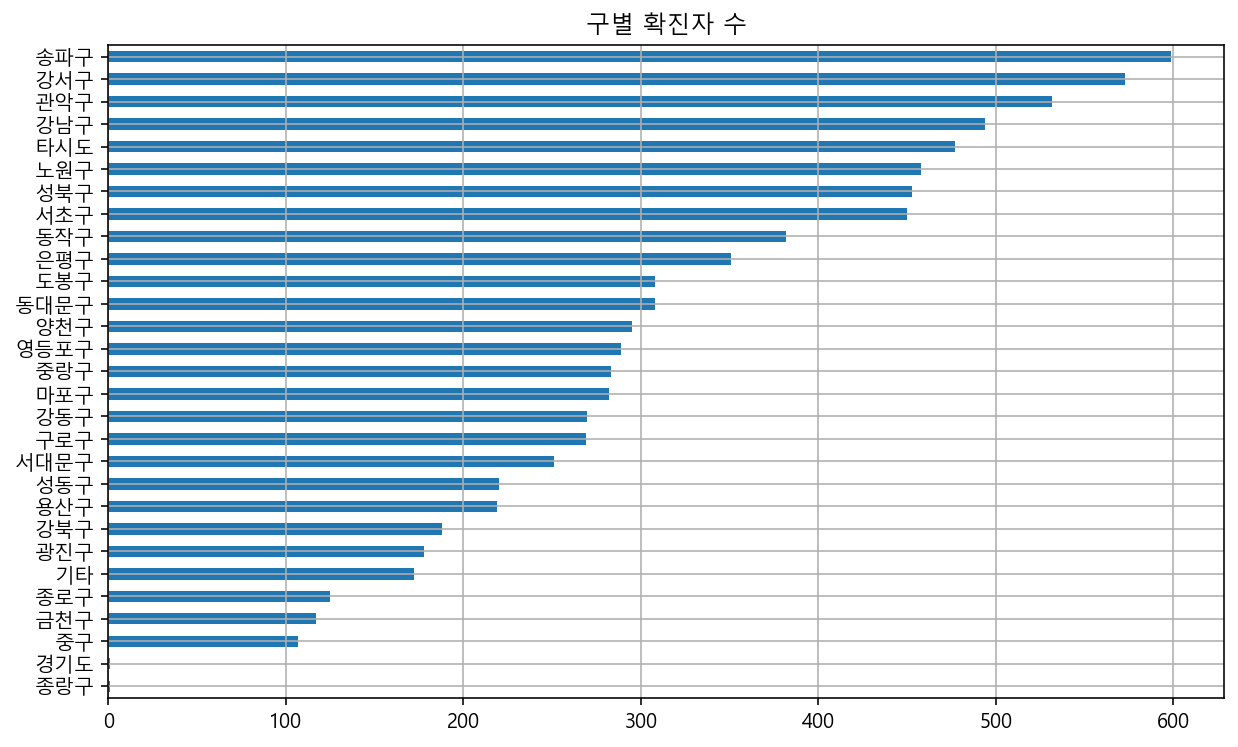

In [56]:
# 구별 확진자의 수를 시각화 합니다.
gu_count.sort_values().plot.barh(title = "구별 확진자 수", figsize = (10, 6), grid = True)

In [181]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.
gu

Index(['송파구', '강서구', '관악구', '강남구', '타시도', '노원구', '성북구', '서초구', '동작구', '은평구',
       '동대문구', '도봉구', '양천구', '영등포구', '중랑구', '마포구', '강동구', '구로구', '서대문구', '성동구',
       '용산구', '강북구', '광진구', '기타', '종로구', '금천구', '중구', '경기도', '종랑구'],
      dtype='object')

In [57]:
gu = gu_count.index.tolist()
gu.remove("경기도")
gu.remove("타시도")
gu.remove("기타")
gu

['송파구',
 '강서구',
 '관악구',
 '강남구',
 '노원구',
 '성북구',
 '서초구',
 '동작구',
 '은평구',
 '도봉구',
 '동대문구',
 '양천구',
 '영등포구',
 '중랑구',
 '마포구',
 '강동구',
 '구로구',
 '서대문구',
 '성동구',
 '용산구',
 '강북구',
 '광진구',
 '종로구',
 '금천구',
 '중구',
 '종랑구']

In [58]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.
# 집합 자료형 set, 집합 연산 가능

set(gu_count.index) - set(gu)

{'경기도', '기타', '타시도'}

In [59]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "거주지"]
df_gu

,구,거주지
0,송파구,599
1,강서구,573
2,관악구,532
3,강남구,494
4,타시도,477
5,노원구,458
6,성북구,453
7,서초구,450
8,동작구,382
9,은평구,351


In [60]:
# isin([찾고자 하는 리스트값])
# ~표시는 not을 의미
df_gu[~df_gu["구"].isin(gu)]

,구,거주지
4,타시도,477
23,기타,172
27,경기도,1


In [61]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
# df.loc[~df["거주지"].isin(gu)]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
df_gu.loc[df_gu["구"] == "종랑구", "구"] = "중랑구"
df_gu.loc[df_gu["구"] == "타시도", "구"] = "타시도"
df_gu.loc[df_gu["구"] == "기타", "구"] = "타시도"
df_gu.loc[df_gu["구"] == "경기도", "구"] = "타시도"

In [62]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"]

df.loc[df["지역"] == "종랑구", "지역"] = "중랑구"
df.loc[df["지역"] == "타시도", "지역"] = "타시도"
df.loc[df["지역"] == "기타", "지역"] = "타시도"
df.loc[df["지역"] == "경기도", "지역"] = "타시도"

<AxesSubplot:title={'center':'구별 확진자 수'}>

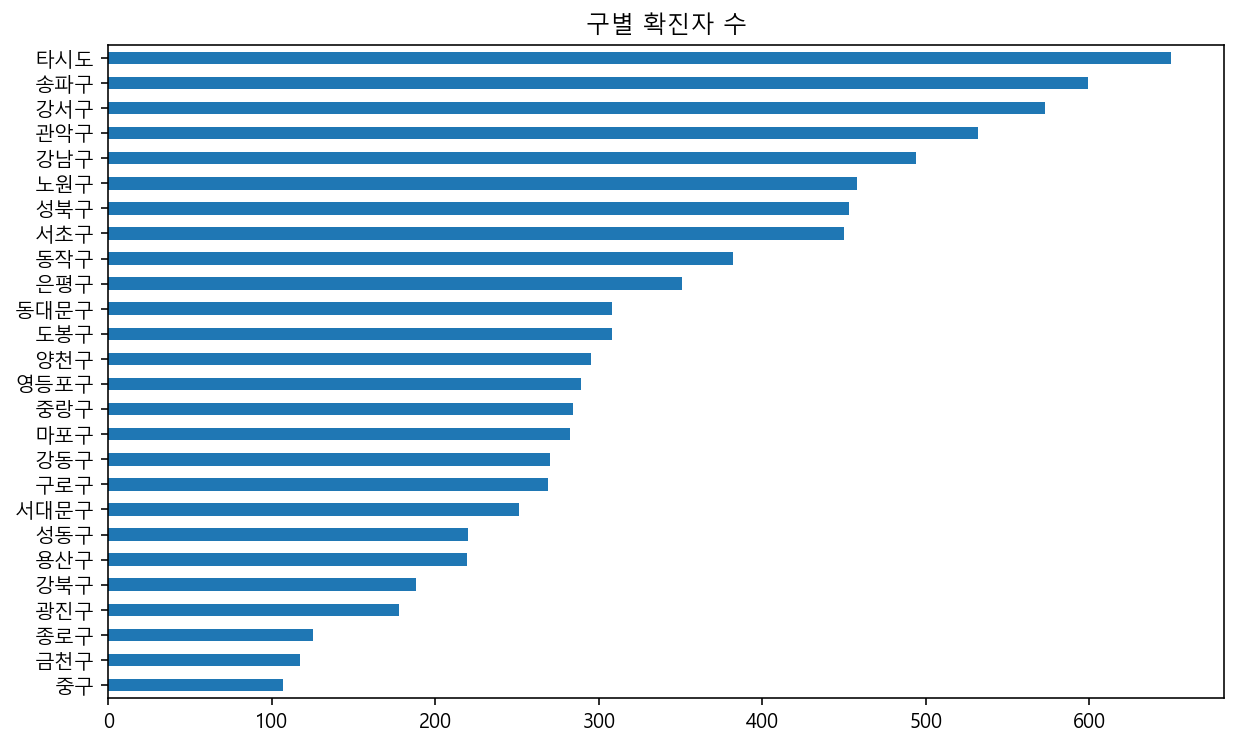

In [63]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
# gu_etc_count
df["지역"].value_counts().sort_values().plot.barh(figsize=(10,6), title="구별 확진자 수")